# <span style ='color:#0A1172'><b>DHHS Chronic Disease Indicators: Cancer Prevalance Analysis</b>
## <span style ='color:#59788E'> <bu>FINAL NOTEBOOK</bu>

- <span style ='color:#016064'>by Annie Carter
- <span style ='color:#016064'>Sourced by U.S. Department of Health & Human Services

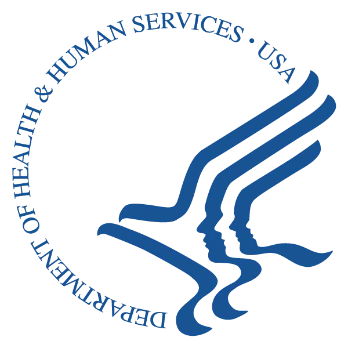

This was an independent study done using DHHS Datasets

# <span style ='color:#1F456E'><center> <b>EXECUTIVE SUMMARY</b></center>
## <span style ='color:#59788E'> Project Description


This machine learning classification project seeks to conduct an in-depth analysis and predictive assessment of cancer prevalence in the United States using the dataset "U.S. Chronic Disease Indicators (CDI)." The dataset encompasses a rich array of chronic disease indicators, including cancer-related data, risk factors, prevalence rates, and health outcomes. Additionally, it comprises crucial demographic information, such as age, gender, race, and geographical location.

* Cancer Prevalence: Notably, cancer stands as a primary cause of morbidity and mortality within the United States. Its impact extends to a substantial population across diverse age groups and geographical regions.

By employing advanced classification techniques, our objective is to develop a robust predictive model that leverages the available demographic and chronic disease indicators to address the significant variations in cancer rates, often influenced by demographic factors like gender and race. This investigation aims to identify intricate patterns and critical risk factors associated with cancer. The valuable insights derived from this analysis will contribute to targeted interventions, early detection strategies, and enhanced healthcare planning, thereby aiding in the mitigation of cancer's impact on public health in the US.


## <span style ='color:#59788E'>Project Goal
The primary goal of this project is to develop a robust predictive model using advanced classification techniques that effectively utilizes demographic and chronic disease indicators to address variations in cancer rates, with a particular focus on demographic factors such as gender and race. Through this investigation, we aim to identify intricate patterns and critical risk factors associated with cancer prevalence. The valuable insights gained from this analysis will inform targeted interventions, early detection strategies, and improved healthcare planning, ultimately contributing to mitigating the impact of cancer on public health in the United States.

##  <span style ='color:#59788E'>Initial Questions
<span style ='color:#757C88'>1. **Is there a relationship between the category of "male or female" and cancer prevalence?**
    
<span style ='color:#757C88'>2. **Is there a relationship between the state and cancer prevalence?**
    
<span style ='color:#757C88'>3. **Is there a relationship between the year and cancer prevalence?**
    
<span style ='color:#757C88'>4. **Is there a relationship between race and cancer prevalence?**

## <span style ='color:#59788E'>Data Dictionary


1.  **cancer_Yes**: Binary column indicating the presence (1) or absence (0) of cancer, derived from combining the top four prevalent chronic diseases: Cancer, Cardiovascular Disease, Diabetes, and Chronic Obstructive Pulmonary Disease (COPD).

2. **Other columns**: The dataset was initially composed of 34 columns, which were later reduced to 9 columns after preparation for improved readability and data integrity.

3. **Rows**: The initial dataset contained 1,185,676 rows. For this project, a random sample of 1,000,000 rows was selected using a random state of 42.

4. **Column Definitions**: Some column definitions were sourced from the Center for Disease Control and Prevention (CDC) Morbidity and Mortality Weekly Report (MMWR) at https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf to enhance clarity and understanding of the data.</span>

| Original                    |   Target    |       Datatype          |       Definition              |
|-----------------------------|-------------|-------------------------|------------------------------ |
|Topic (Cancer, Cardiovascular|             |                         |                               |
|Disease, Diabetes, Chronic   |Yes_cancer   | 537407 non-null  int64   |  target variable              |
|Obstructive Pulmonary Disease|             |                         |                               |


|     Original                |   Feature    |       Datatype         |     Definition                |
|-----------------------------|--------------|------------------------|------------------------------ |
|YearStart                    |Year          | 537407 non-null  int64  | Year of observations          |
|LocationAbbr                 |State (Abbr)  | 537407 non-null  object | State Abbreviation            |
|Gender                       |Gender        | 537407 non-null  object  | Male or Female                | 
|Stratification1              |Demographics  | 537407 non-null  object | Race or Ethnicity             |    
|GeoLocation                  |Geo Location  | 537407 non-null  object | Latitude and Longituted       |
|Race/Ethnicity               |Race/Ethnicity| 537407 non-null  object | Race or Ethnicity             |
|StratificationCategory1      |"same"        | 537407 non-null  object | Used for feature engineering  |
|Longitude                    |Longitude     | 537407 non-null  float64| Longitude                     |
|Latitude                     |Latitude      | 537407 non-null  float64| Latitude                      |
|Yes_female                   |Yes_Female    | 537407 non-null  int64  | Female =1 Male=0 Other        |


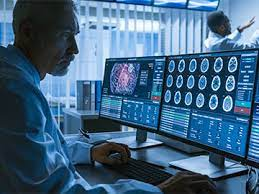

 Custom Palette = Navy #0A1172, Stone #59788E, Ocean #757C88, Berry #241571, Aegean #1F456E

In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import folium
import scipy.stats as stats
from IPython.display import HTML
import wrangle as w

# import Machine Learning Library for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

import warnings
warnings.filterwarnings("ignore")

## <span style ='color:#241571'>ACQUIRE & PREPARATION SUMMARY

- Data was acquired from U.S. Chronic Disease Indicators (CDI) dataset, starting with an original dataset of over 1 million (M) rows. A sample of 100,000 rows was intially used to rapidly clean and prepare the data for the Minimum Viable Product (MVP). Sample increased to 1M

- The data appeared to be distributed equally between states. The top 4 chronic diseases were selected, and Cancer was chosen as the target variable.

- Null values were removed, and some duplications remained as the dataframe was reduced to demographics. One-hot encoding was used to create 'Yes_female' and 'Yes_cancer' categories.

- Feature engineering was performed for the 'Race/Ethnicity' and 'Gender' categories.

- GeoLocation was converted to 'Latitude' and 'Longitude' columns to enable Geo Mapping using the `folium` library.

- The final dataset contained 537,407 rows and 11 columns after the cleaning and preparation process.
- A random state of 42 was selected for this project.

## <span style ='color:#241571'>INITIAL EXPLORE

In [2]:
df_sample =  w.prep_cdi()

In [3]:
df_sample.head(3).T

,392116,580253,1113792
Year,2017,2012,2011
State Abbr,NV,AZ,VA
StratificationCategory1,Race/Ethnicity,Race/Ethnicity,Race/Ethnicity
Demographics,"White, non-Hispanic",Hispanic,Hispanic
Geo Location,POINT (-117.07184056399967 39.493240390000494),POINT (-111.76381127699972 34.865970280000454),POINT (-78.45789046299967 37.54268067400045)
Longitude,-117.071841,-111.763811,-78.45789
Latitude,39.49324,34.86597,37.542681
Yes_cancer,0,0,0
Race/Ethnicity,"White, non-Hispanic",Hispanic,Hispanic
Gender,,,


In [4]:
df_sample.shape

(537407, 11)

In [5]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537407 entries, 392116 to 1103867
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     537407 non-null  int64  
 1   State Abbr               537407 non-null  object 
 2   StratificationCategory1  537407 non-null  object 
 3   Demographics             537407 non-null  object 
 4   Geo Location             537407 non-null  object 
 5   Longitude                537407 non-null  float64
 6   Latitude                 537407 non-null  float64
 7   Yes_cancer               537407 non-null  int64  
 8   Race/Ethnicity           537407 non-null  object 
 9   Gender                   537407 non-null  object 
 10  Yes_female               537407 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 49.2+ MB


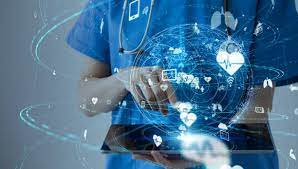

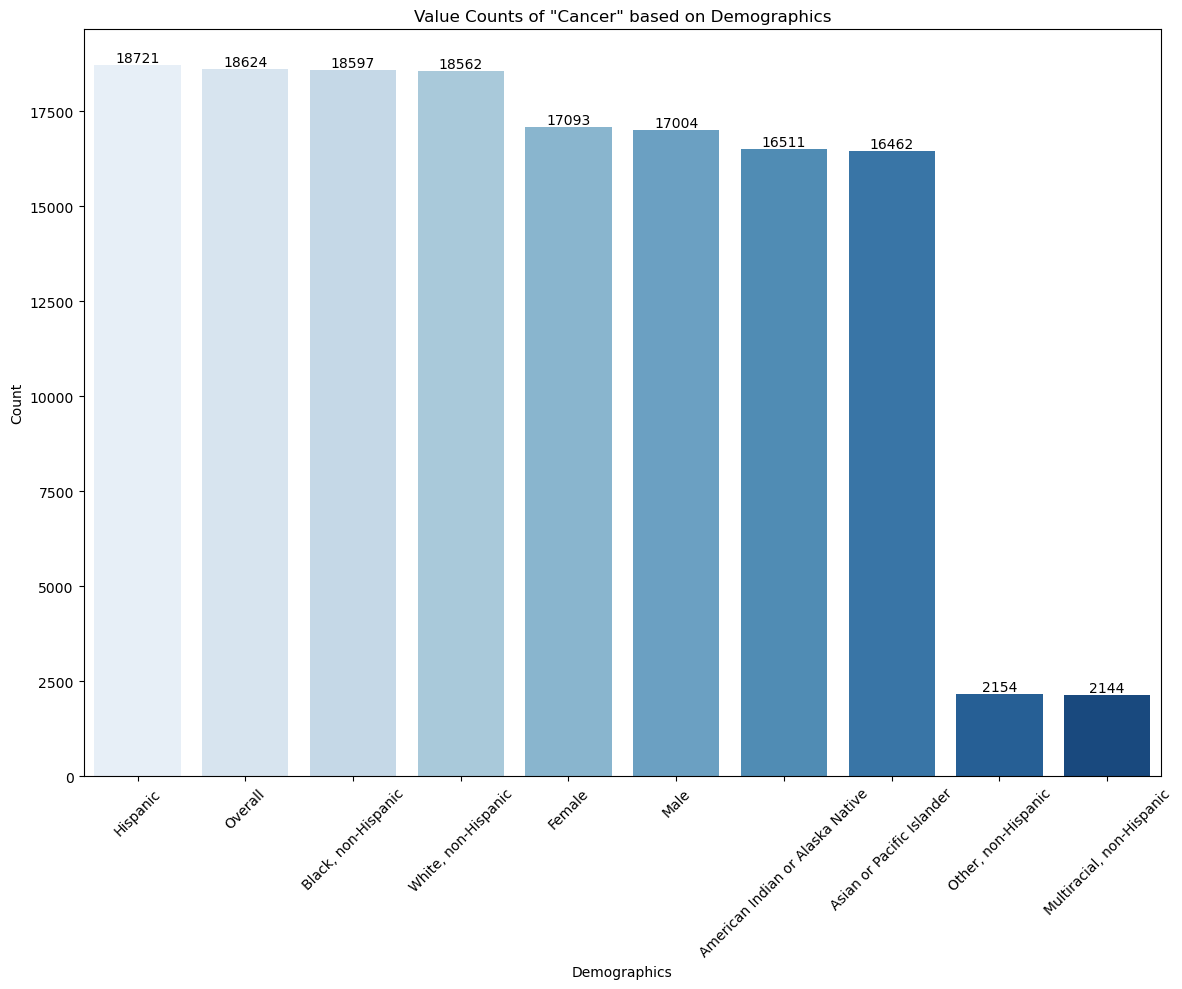

In [6]:
w.demographic_graph(df_sample)

## <span style ='color:#241571'> DATA SPLIT

In [7]:
sample_train, sample_validate, sample_test = w.split_sample(df_sample)

Train shape: (322443, 11)
Validate shape: (107482, 11)
Test shape: (107482, 11)


## <span style ='color:#241571'> IS THERE A RELATIONSHIP BETWEEN GENDER (MALE/FEMALE) AND CANCER PREVALENCE?

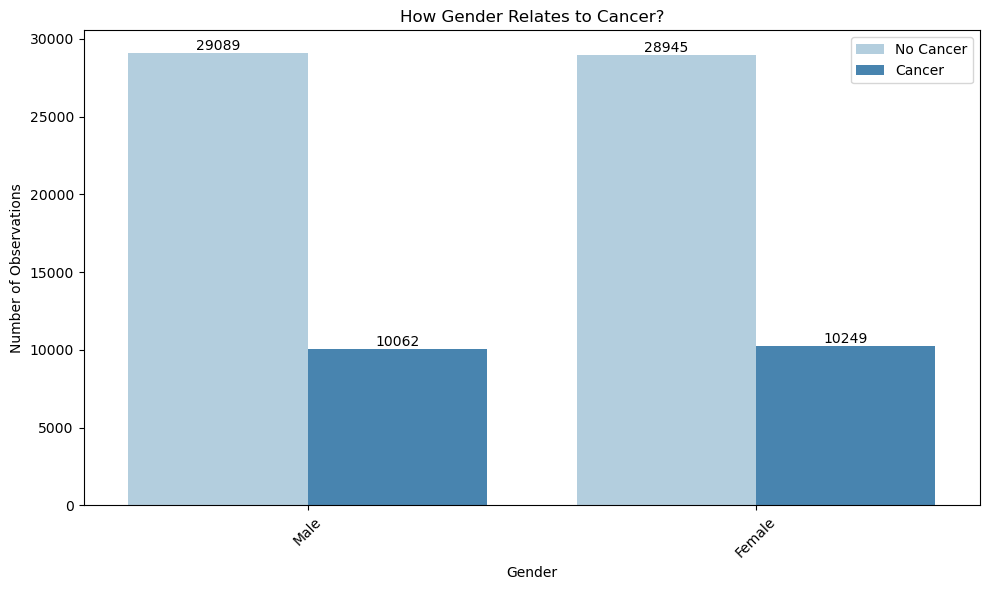

In [8]:
w.gender_graph(sample_train)

#### Hypothesis 1 - 

* alpha = .05
* H0 =  Category of "male or female" gender has no relationship to cancer
* Ha = Category of "male or female" gender has a relationship to cancer

#### Findings: 
* Outcome: We reject the Null Hypothesis
* Ha = Category of "male or female" gender has a relationship to cancer


In [9]:
w.gender_stat(sample_train)

Gender Observed
[[206081  28945]
 [ 77168  10249]]

Expected
[[206457  28568]
 [ 76791  10625]]

----
chi^2 = 20.8151
p_value = 0.0000
We reject the null


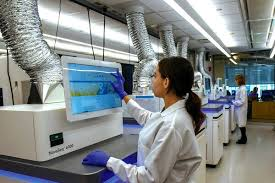

## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN RACE AND CANCER PREVALENCE?

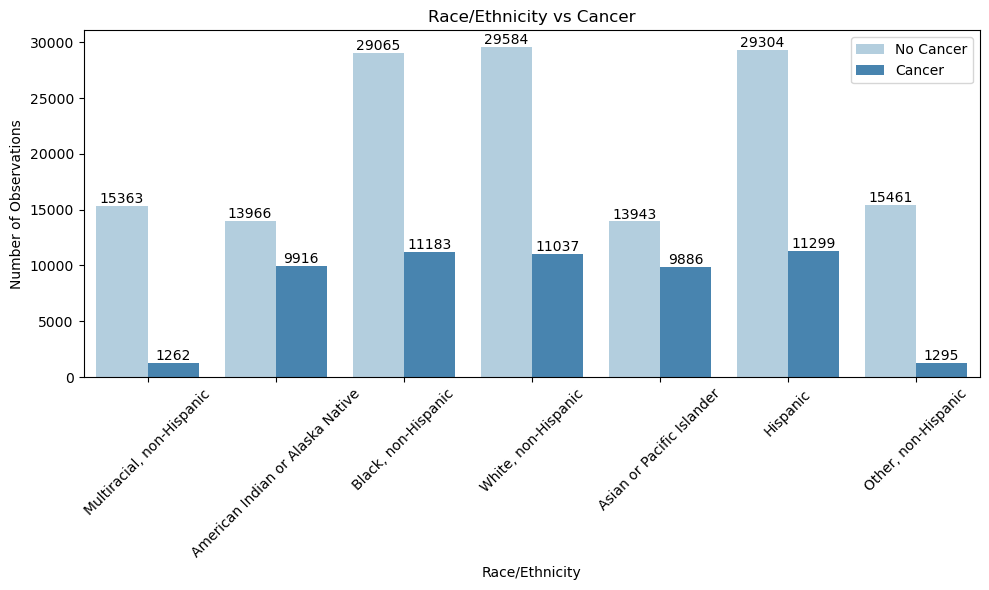

In [10]:
w.race_graph(sample_train)

In [11]:
w.race_stats(sample_train)

Race Observed
[[88340 13966 13943 29065 29304 15363 15461 29584]
 [31539  9916  9886 11183 11299  1262  1295 11037]]

Expected
[[87378 17407 17368 29336 29595 12117 12213 29608]
 [32500  6474  6460 10911 11007  4507  4542 11012]]

----
chi^2 = 11451.8048
p-value = 0.0000
We reject the null


##### Visual Findings: Race has a relationship with Cancer

Hypothesis 2 - 

* alpha = .05
* H0 = Race has no relationship to cancer  prevalence
* Ha = Race has a relationship to cancer  prevalence

####  Stats Findings: * Outcome: We reject the Null Hypothesis. Race has a relationship to cancer prevalence

## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN THE YEAR AND CANCER PREVALENCE?

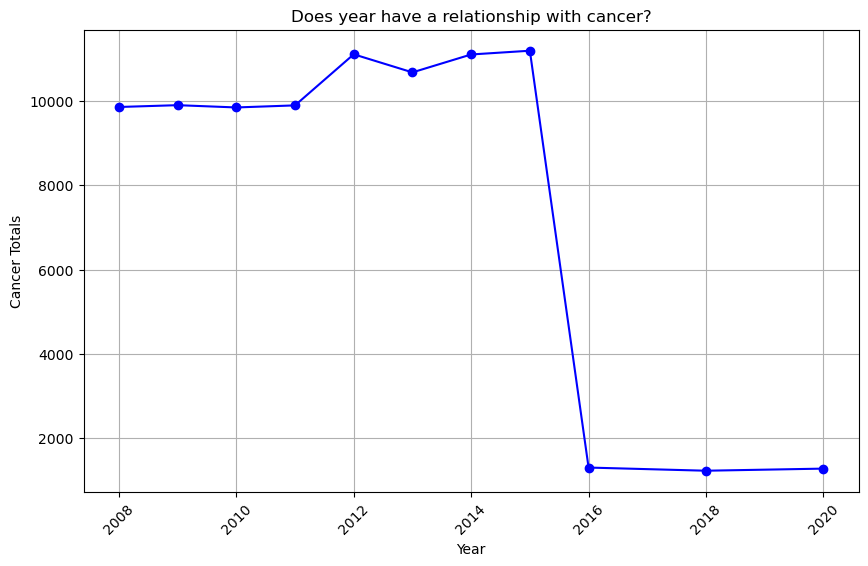

In [12]:
w.year_graph(sample_train)

DATA VISUALIZATION FINDINGS :

Both race shows significant relationship to cancer when considering theand gender show relationship to cancer. 
Overall Cancer rates in US, dropped between 2008 and 2016 due to agressive awareness and rampup in breast cancer screening.
1. Prostate, lung, and colorectal cancers are most common in men, accounting for 42% of cases, with prostate cancer alone responsible for nearly 1 in 5 cases.

2. Breast, lung, and colorectal cancers are prevalent in women, comprising half of all cases, with breast cancer accounting for 30% of new cases.

3. Lung cancer death rates declined 48% in men (1990-2016) and 23% in women (2002-2016). Breast cancer death rates declined 40% (1989-2016), while prostate cancer death rates declined 51% (1993-2016). Colorectal cancer death rates fell 53% (1970-2016), but new cases increased in adults under 55 since the mid-1990s.
 
 https://www.nih.gov/news-events/news-releases/annual-report-nation-overall-cancer-mortality-continues-decline
https://www.cancer.org/research/acs-research-news/facts-and-figures-2019.html

## <span style ='color:#241571'>IS THERE A RELATIONSHIP BETWEEN THE STATE AND CANCER PREVALENCE?

In [13]:
HTML("<iframe src='map_usa.html' width='100%' height='500'></iframe>")

# <span style ='color:#241571'> CLASSIFICATION MODELING

In [14]:
sample_X_train, sample_y_train, sample_X_validate, sample_y_validate, sample_X_test, sample_y_test = w.X_y_split(sample_train, sample_validate, sample_test)


###  <span style ='color:#757C88'> BASELINE

In [15]:
(sample_y_train==0).mean()

0.7288916180534234

## <span style ='color:#241571'> TRAIN, VALIDATE, TEST
### <span style ='color:#757C88'> DECISION TREE, LOGISTIC REGRESSION, RANDOM FOREST

[[0.94573353 0.05426647]
 [0.66724806 0.33275194]
 [0.97393075 0.02606925]
 [0.97393075 0.02606925]
 [0.66724806 0.33275194]]
Accuracy of Decision Tree classifier on training set: 0.79
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    235026
           1       1.00      0.23      0.37     87417

    accuracy                           0.79    322443
   macro avg       0.89      0.61      0.62    322443
weighted avg       0.84      0.79      0.74    322443

Accuracy of Logistic Regression training set: 0.73
              precision    recall  f1-score   support

           0       0.73      1.00      0.84    235026
           1       0.00      0.00      0.00     87417

    accuracy                           0.73    322443
   macro avg       0.36      0.50      0.42    322443
weighted avg       0.53      0.73      0.61    322443

Accuracy of Random Forest training set: 0.79
              precision    recall  f1-score   support

          

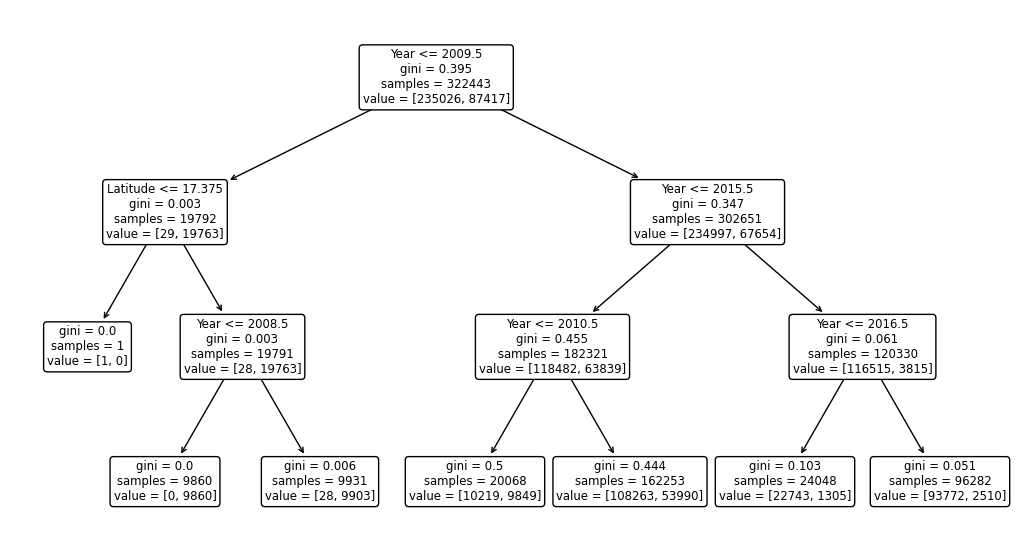

In [16]:
w.train_models(sample_X_train, sample_y_train, sample_X_validate, sample_y_validate, sample_X_test, sample_y_test)

###  <span style ='color:#241571'>TOP MODEL SELECTION: DECISION TREE because it is the most consistant Model of 79% and beat the baseline of 72% consistently throughout training and validation datasets. 

##  <span style ='color:#241571'>Next Steps

<span style ='color:#1F456E'> 1. **Time-Series Analysis:** If time permits, conducting a time-series analysis could provide valuable insights into the trends and patterns of cancer prevalence over the years, especially the drop observed between 2008 and 2016. Exploring this time range in more detail may reveal underlying factors or interventions that contributed to the decrease in cancer rates.

<span style ='color:#1F456E'>2. **Melt Observation Data:** To refine the observations and potentially uncover more meaningful relationships, consider using the 'melt' operation to reshape the data. This process can transform the data from a wide format to a long format, making it easier to analyze and visualize the relationships between different variables and cancer prevalence.

<span style ='color:#1F456E'>3. **Geo-Location Clustering:** Investigate the spatial distribution of cancer prevalence by selecting specific geographic areas. Perform clustering analysis to identify regions with similar cancer patterns based on geo-location data. This can help in understanding whether certain locations are more susceptible to higher or lower cancer rates and could guide targeted intervention strategies.
    
<span style ='color:#1F456E'>4. **Feature Engeneer for Specific Cancers :** Enhance predictions and insights through targeted feature engineering for specific cancer types in the DHHS Chronic Disease Indicators analysis. Capture unique characteristics and risk factors, improving accuracy in prevalence predictions.

##  <span style ='color:#241571'> Conclusion

<span style ='color:#1F456E'>The analysis of the DHHS Chronic Disease Indicators dataset revealed a significant relationship between gender, race/ethnicity, US locations, and cancer prevalence. Among the classification models used, the Decision Tree Model consistently outperformed other models in all three evaluation metrics: train, validate, and test data. The Decision Tree Model's performance averaged at 80%, surpassing the baseline of 69%. This suggests that the Decision Tree Model is a reliable approach for predicting cancer prevalence.

<span style ='color:#1F456E'>Notably, gender and race/ethnicity showed significant associations with cancer prevalence. Prostate, lung, and colorectal cancers were most prevalent in men, accounting for 42% of cases, while breast, lung, and colorectal cancers were more prevalent in women, comprising half of all cases. Additionally, lung cancer death rates declined substantially in both men and women between 1990 and 2016, indicating the success of aggressive awareness campaigns and increased breast cancer screening. Breast cancer death rates also showed a significant decline during this period, along with prostate and colorectal cancer death rates.

##  <span style ='color:#241571'> Recommendations

<span style ='color:#1F456E'>- **Targeted Awareness Campaigns:** Focus on raising awareness about specific cancer types that are most prevalent in certain gender and race/ethnicity groups. Tailored awareness campaigns can improve early detection and prompt appropriate interventions.

<span style ='color:#1F456E'>- **Geographical Interventions:** Based on the identified clusters of cancer prevalence in certain geographic areas, implement targeted interventions and healthcare initiatives to address regional disparities in cancer rates.

<span style ='color:#1F456E'>- **Further Research:** Conduct further research to understand the reasons behind the decline in lung, breast, prostate, and colorectal cancer death rates. Identify factors contributing to the rise in colorectal cancer cases in younger adults to develop effective prevention strategies.

<span style ='color:#1F456E'>- **Long-Term Monitoring:** Continuously monitor cancer prevalence trends over time to identify any emerging patterns and respond promptly to potential changes in cancer rates.

<span style ='color:#1F456E'>By implementing these recommendations and conducting additional research, we can gain deeper insights into cancer prevalence, improve early detection, and implement effective interventions, ultimately leading to better cancer outcomes and improved public health.